<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chaînes-de-caractères-(suite)" data-toc-modified-id="Chaînes-de-caractères-(suite)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chaînes de caractères (suite)</a></span><ul class="toc-item"><li><span><a href="#Modifier-les-chaînes" data-toc-modified-id="Modifier-les-chaînes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modifier les chaînes</a></span></li><li><span><a href="#Opérations-sur-les-chaînes" data-toc-modified-id="Opérations-sur-les-chaînes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Opérations sur les chaînes</a></span><ul class="toc-item"><li><span><a href="#Affectation" data-toc-modified-id="Affectation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Affectation</a></span></li><li><span><a href="#Copier-une-chaîne" data-toc-modified-id="Copier-une-chaîne-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Copier une chaîne</a></span></li><li><span><a href="#Comparer-deux-chaînes" data-toc-modified-id="Comparer-deux-chaînes-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Comparer deux chaînes</a></span></li><li><span><a href="#strcmp" data-toc-modified-id="strcmp-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>strcmp</a></span></li><li><span><a href="#Chercher-une-sous-chaîne-dans-une-chaîne" data-toc-modified-id="Chercher-une-sous-chaîne-dans-une-chaîne-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Chercher une sous-chaîne dans une chaîne</a></span></li></ul></li></ul></li><li><span><a href="#La-Pile" data-toc-modified-id="La-Pile-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La Pile</a></span></li><li><span><a href="#Le-Tas-(Heap)" data-toc-modified-id="Le-Tas-(Heap)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Le Tas (Heap)</a></span><ul class="toc-item"><li><span><a href="#Principe-malloc-free" data-toc-modified-id="Principe-malloc-free-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Principe malloc-free</a></span></li><li><span><a href="#Malloc" data-toc-modified-id="Malloc-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Malloc</a></span></li><li><span><a href="#Free" data-toc-modified-id="Free-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Free</a></span></li><li><span><a href="#Exercice:-Fonction-de-cryptage" data-toc-modified-id="Exercice:-Fonction-de-cryptage-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exercice: Fonction de cryptage</a></span></li></ul></li></ul></div>

In [1]:
!pip install git+git://github.com/frehseg/gcc4jupyter
%load_ext gcc_plugin

  Cloning git://github.com/frehseg/gcc4jupyter to /tmp/pip-req-build-_t05vlh4
  Running command git clone -q git://github.com/frehseg/gcc4jupyter /tmp/pip-req-build-_t05vlh4
  Created wheel for GCCPlugin: filename=GCCPlugin-0.0.6-cp37-none-any.whl size=2931 sha256=dfb5566a429f690b849a1a41d73ecba26163702b9d307179f4ebba0ad2267fc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-mncqu2um/wheels/a6/ff/b4/023d42d3ec7c36b10e15db2a808aae8b2475e19fa6e370f85c
Successfully built GCCPlugin


# Chaînes de caractères (suite)


## Modifier les chaînes

Rappel : une chaîne déclaré avec `char* ` n'est pas modifiable si elle est initialisée avec une chaîne entre guillemets (`"..blabla..."`).

In [14]:
%%c
#include <stdio.h>
int main() {
   char* chaine = "ENSTA";
   *chaine = 'I';             // erreur : non modifiable 
   printf("%s\n", chaine );
}

La cellule ci-dessous n'affiche rien parce que le programme se plante.

Dans le programme suivant tout va bien, parce qu'on déclare la chaîne 
avec `[]`:

In [17]:
%%c
#include <stdio.h>
int main() {
   char chaine[] = "ENSTA";
   chaine[0] = 'I';              // ok
   printf("%s\n", chaine );
}

INSTA



## Opérations sur les chaînes
### Affectation

__Attention:__ ```
chaine2 = chaine1;```

ne fait pas de copie! On fait juste pointer `chaine2` vers la même adresse que `chaine1`.

Voici un exemple pour montrer que les deux pointent vers les mêmes lettres. Dans l'exemple suivant, une modification de `chaine1` change également `chaine2`.

In [19]:
%%c
#include <stdio.h>
int main() {
   char chaine1[] = "ENSTA";
   char* chaine2;
   chaine2 = chaine1;
   chaine1[0] = 'I';
   printf("%s\n", chaine1 );
   printf("%s\n", chaine2 );
}

INSTA
INSTA



### Copier une chaîne

Pour faire une copie d'une chaîne, il y la commande `strcpy`, fournie par la bilbiothèque `string.h`.

`char* strcpy (dest, source)`

copie à partir de l'adresse `source` lettre par lettre toute la chaîne vers l'adresse `dest`. La valeur de retour est ici inutile, c'est simplement l'adresse `dest`. Attention: il faut prévoir assez de place à la destination, sinon il peut y avoir des erreurs graves.

In [21]:
%%c
#include <stdio.h>
#include <string.h>
int main() {
   char chaine1[] = "ENSTA";
   char chaine2[100];
   strcpy(chaine2,chaine1); // on fait une copie
   *chaine1 = 'I';          // une modification ne touche pas l'original
   printf("%s\n", chaine1 );
   printf("%s\n", chaine2 );
}

INSTA
ENSTA



### Comparer deux chaînes

Pour comparer deux chaines, on ne peut pas utiliser un comparaison de la forme `chaine1 == chaine2`. Cela compare les adresses de `chaine1` et `chaine2` au lieu des lettre de la chaîne.

In [90]:
%%c
#include <stdio.h>
int main() {
   char chaine1[] = "ENSTA";
   char chaine2[] = "ENSTA";
   printf("%d\n", chaine1 == chaine2 );
   printf("%p\n", chaine1 );
   printf("%p\n", chaine2 );
}

0
0x7ffcdcadde7c
0x7ffcdcadde82


On compare ici les adresses au lieux des lettres et ces adresses ne sont pas les mêmes!

### strcmp

`int strcmp(chaine1,chaine2)`
donne la __différence__ entre les chaînes
- 0 si égales
- <0 si chaine1 < chaine2 dans l'ordre lexicographique
- '>0' si chaine1 > chaine2

In [27]:
%%c
#include <stdio.h>
#include <string.h>
int main() {
   char chaine1[] = "ENSTA";
   char chaine2[] = "ENSTA";
   printf("%d\n", strcmp(chaine1,chaine2));
}

0



Ci-dessus, les chaînes sont égaux, donc `strcmp` donne `0` (pas de différence).

In [28]:
%%c
#include <stdio.h>
#include <string.h>
int main() {
   char chaine1[] = "ENSTA";
   char chaine2[] = "FNSTA";
   char chaine3[] = "GNSTA";
   printf("%d\n", strcmp(chaine1,chaine2));
   printf("%d\n", strcmp(chaine1,chaine3));
}

-1
-2



Ci-dessus, `strcmp` donne `-1` car la première lettre de  `chaine1` qui est différente de celles de `chaine2` est `E`, ce qui dans l'alphabet est 1 place avant `F`.

Ensuite `strcmp` donne `-2` car la première lettre de  `chaine1` qui est différente de celles de `chaine3` est `E`, ce qui dans l'alphabet est 2 places avant `G`.

### Chercher une sous-chaîne dans une chaîne

`char* strstr (botte_de_foin, aiguille)`

si trouvé, donne le pointeur où `aiguille` commence dans `botte_de_foin`

si pas trouvé, donne 0.


In [30]:
%%c
#include <string.h>
#include <stdio.h>
int main() {
   char botte_de_foin[] = "J'adore l'ENSTA, c'est top.";
   char aiguille[] = "ENSTA";
   char* trouve = strstr(botte_de_foin,aiguille);
   printf("%p\n",trouve);
   printf("%s\n",trouve);
   trouve = strstr(botte_de_foin,"toto");
   printf("%p\n",trouve); // nil = 0
}

0x7fff0f16027a
ENSTA, c'est top.
(nil)



# La Pile

Les variables locales sont stockés dans une zone mémoire appelée *la pile* (*stack*).

Sa fin est indiqué par le pointeur de pile.

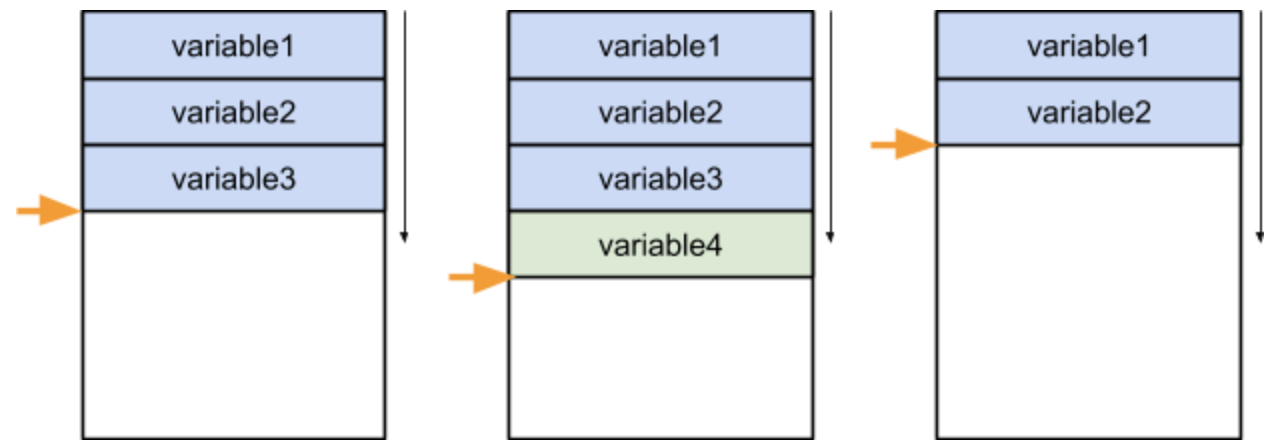

- mémoire est libre au dessus de pointeur de pile, occupé en-dessous
- simplifie la gestion de mémoire
- rapide
- taille limitée par l'OS:  *stack overflow error*

On peut regarder la taille de la pile avec la commande shell: 
```ulimit -a```

Cela affiche:
    
``stack size              (kbytes, -s) 8192``

La pile peut stocker 8192 kilo-octets, donc 8192*1024 octets.
Si on essaie de faire un tableau statique de cette taille, le programme se plante, parce qu'il n'y aura pas assez de place (la pile est déjà un peu rempli avec quelques d'autres données).

In [34]:
%%c
#include <stdio.h>
int main() {
    char grandtableau[1024*8192]; // aussi grand que la pile
    // le programme s'arrête ici parce que le tableau est trop grand
    printf("%p",grandtableau);    
}

En diminuant un peu la taille du tableau, ça passe:

In [33]:
%%c
#include <stdio.h>
int main() {
    char grandtableau[1024*8172]; // plus petit que la pile
    printf("%p",grandtableau);    
}

0x7ffc4b9edfb0


# Le Tas (Heap)

Des zones de mémoire arbitrairement grandes peuvent être réservés sur *le tas* (heap).

réservation "manuelle" avec 
- `malloc` : réserver X octets et obtenir l'adresse d'une zone
- `free` : libérer la zone

## Principe malloc-free

1. Réserver la mémoire et obtenir le pointeur :<br>
   type`*` mon_pointeur `= malloc(`taille`);`
2. Travailler avec mon_pointeur...
3. A la fin, libérer la mémoire :<br>
   `free(`mon_pointeur`);`


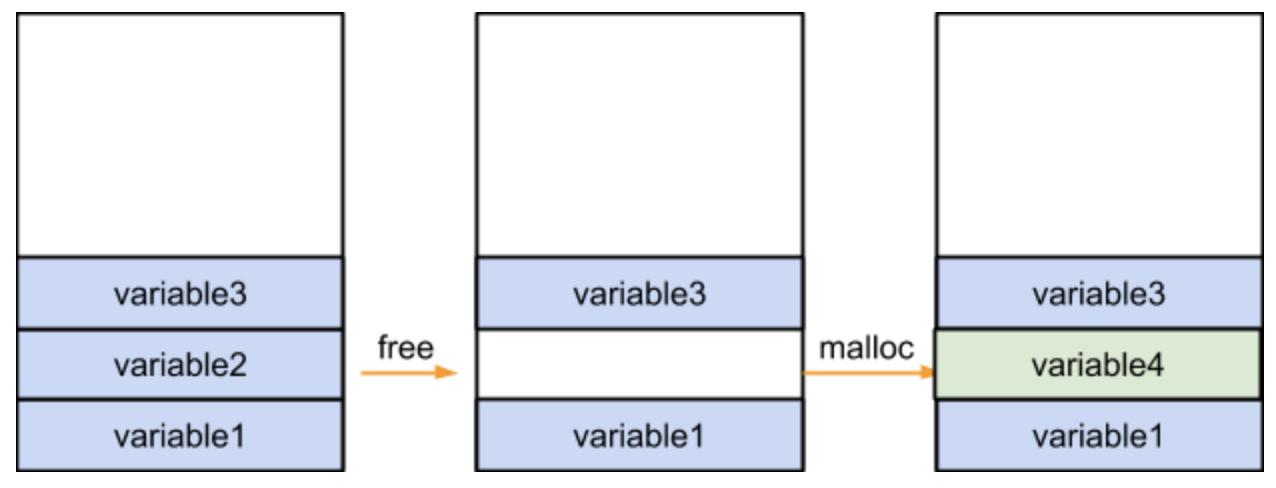

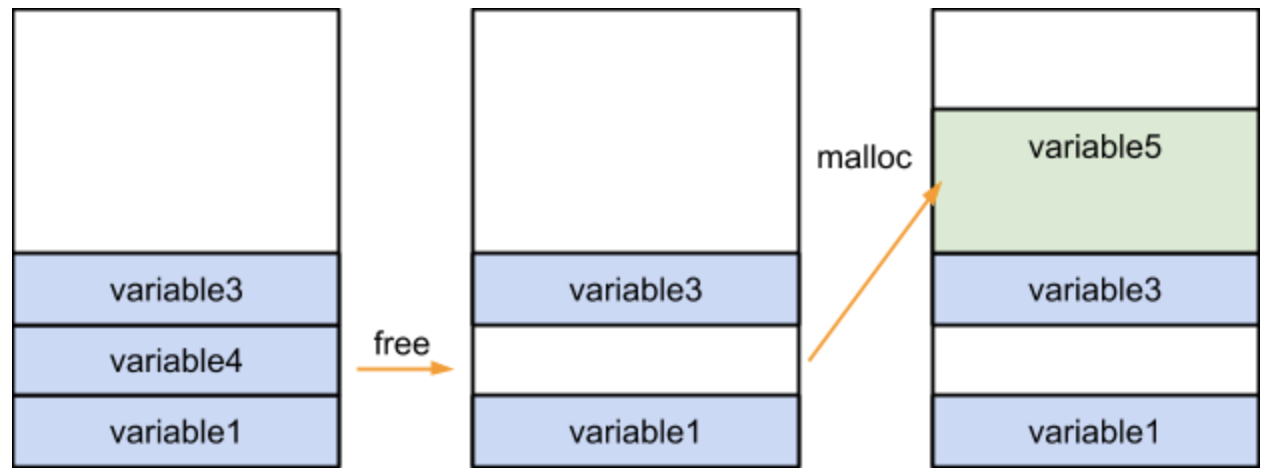

- il peut y avoir des "trous" de mémoire libre
- liste de blocs libres gérée par malloc/free
- gestion plus compliqué, plus lente

## Malloc

``void* malloc(size_t nombre_d_octets)``
- réserve une zone de `nombre_d_octets` octets dans le tas (plus un peu de place pour une en-tête)
- stocke le nombre d'octets réservés dans une en-tête de la zone
- retourne un pointeur vers le premier octet réservé
- si nécessaire, le tas du processus est agrandi; **si impossible retourne 0**

`size_t` : type entier non-signé assez grand

In [36]:
%%c
#include <stdio.h>
#include <stdlib.h>
int main() {
    char* grandtableau = malloc(1024*8182);
    grandtableau[0] = 13;
    printf("%d\n",grandtableau[0]);
    printf("%p\n",grandtableau);    
}

13
0x7fc637b16010



## Free

``void free(void* ptr)``
- libère la zone associé avec `ptr`



Si accès à une adresse libérée (ou autrement interdite): **segmentation fault**

In [98]:
#include <stdio.h>
#include <stdlib.h>
int main() {
    char* grandtableau = malloc(1024*8182);
    grandtableau[0] = 13;
    printf("%p\n",grandtableau);    
    printf("%d\n",grandtableau[0]);
    free(grandtableau);
    printf("%p",grandtableau);    
    printf("%d\n",grandtableau[0]);
}

0x7f9064568010
13
0x7f9064568010

[C kernel] Executable exited with code -11

Pour réutiliser la mémoire après `free`: de nouveau un `malloc`

In [40]:
%%c
#include <stdio.h>
#include <stdlib.h>
int main() {
    int* grandtableau = malloc(sizeof(int)*1024);
    grandtableau[0] = 13;
    printf("%p\n",grandtableau);    
    printf("%d\n",grandtableau[0]);
    free(grandtableau);
    int* autretableau = malloc(sizeof(int)*2048);
    printf("%p\n",autretableau);    
    printf("%d\n",autretableau[0]);
    free(autretableau);
}

0x55b7c01ff260
13
0x55b7c0201280
0



## Exercice: Fonction de cryptage

Ecrire une fonction `crypter` qui prend en argument une chaîne et une clé `c`, et qui donne
en valeur de retour la chaîne crypté (sans détruire l'original). Les caractères sont cryptés en additionnant `c`.

In [ ]:
%%c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
char* crypter(char* chaine,int cle){
    // 1. réserver la mémoire pour la chaine cryptée
    // 2. pour chaque lettre x dans chaine,
    //    écrire x+cle dans la chaine cryptée
    // 3. retourner le pointeur vers la chaine cryptée
}
int main() {
    char* orig = "ENSTA";
    char* cryp = crypter(orig,3);
    printf("%s\n",cryp);
}

Solution:

In [42]:
%%c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
char* crypter(char* chaine,int cle){
    int longueur = strlen(chaine);
    char* chaine_cryptee = malloc(sizeof(char)*longueur);
    for (int i=0; chaine[i]!=0; ++i) {
        chaine_cryptee[i] = chaine[i]+cle;
    }
    return chaine_cryptee;
}
int main() {
    char* orig = "ENSTA";
    char* cryp = crypter(orig,3);
    printf("%s\n",cryp);
}

HQVWD



Utiliser la même fonction pour décrypter:

In [104]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
char* crypter(char* chaine,int cle){
    int longueur = strlen(chaine);
    char* chaine_cryptee = malloc(sizeof(char)*longueur);
    for (int i=0; chaine[i]!=0; ++i) {
        chaine_cryptee[i] = chaine[i]+cle;
    }
    return chaine_cryptee;
}
int main() {
    char* orig = "ENSTA";
    char* cryp = crypter(orig,3);
    printf("%s\n",cryp);
    char* decryp = crypter(cryp,-3);
    printf("%s\n",decryp);
    free(decryp); // libérer la mémoire!
}

HQVWD
ENSTA
